In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import(
    confusion_matrix
) 
warnings.filterwarnings('ignore')

In [2]:
X_train = np.load("artifacts/X_train.npz")['arr_0']
X_test = np.load("artifacts/X_test.npz")['arr_0']
y_train = np.load("artifacts/y_train.npz")['arr_0']
y_test = np.load("artifacts/y_test.npz")['arr_0']

### Define Multi Models

In [3]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

### Configure K-fold CV

In [4]:
cv = StratifiedKFold(
    n_splits=6,
    shuffle=True, 
    random_state=42)


In [ ]:
trained_models = {}

for model_name, model in models.items():
    print(f"cross validation on  {model_name}...")
    cv_results = cross_validate(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring='f1',
        return_estimator=True,
        return_train_score=False
    )
    test_scores = cv_results['test_score']
    #print(test_scores)
    best_index = np.argmax(test_scores)
    estimator = cv_results['estimator'][best_index]

    trained_models[model_name] = estimator
    

    

cross validation on  Logistic Regression...
cross validation on  Random Forest...
cross validation on  Decision Tree...


In [11]:
trained_models

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'Decision Tree': DecisionTreeClassifier()}

In [14]:
Y_hat_tests ={}
for model_name, model in trained_models.items():
    print(f"predicting on {model_name}...")
    y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = y_hat_test
Y_hat_tests

predicting on Logistic Regression...
predicting on Random Forest...
predicting on Decision Tree...


{'Logistic Regression': array([1, 0, 1, ..., 1, 0, 0], shape=(2000,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(2000,)),
 'Decision Tree': array([0, 0, 0, ..., 1, 0, 0], shape=(2000,))}

In [16]:
cm1 = confusion_matrix(y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(y_test, Y_hat_tests['Random Forest'])
cm3 = confusion_matrix(y_test, Y_hat_tests['Decision Tree'])



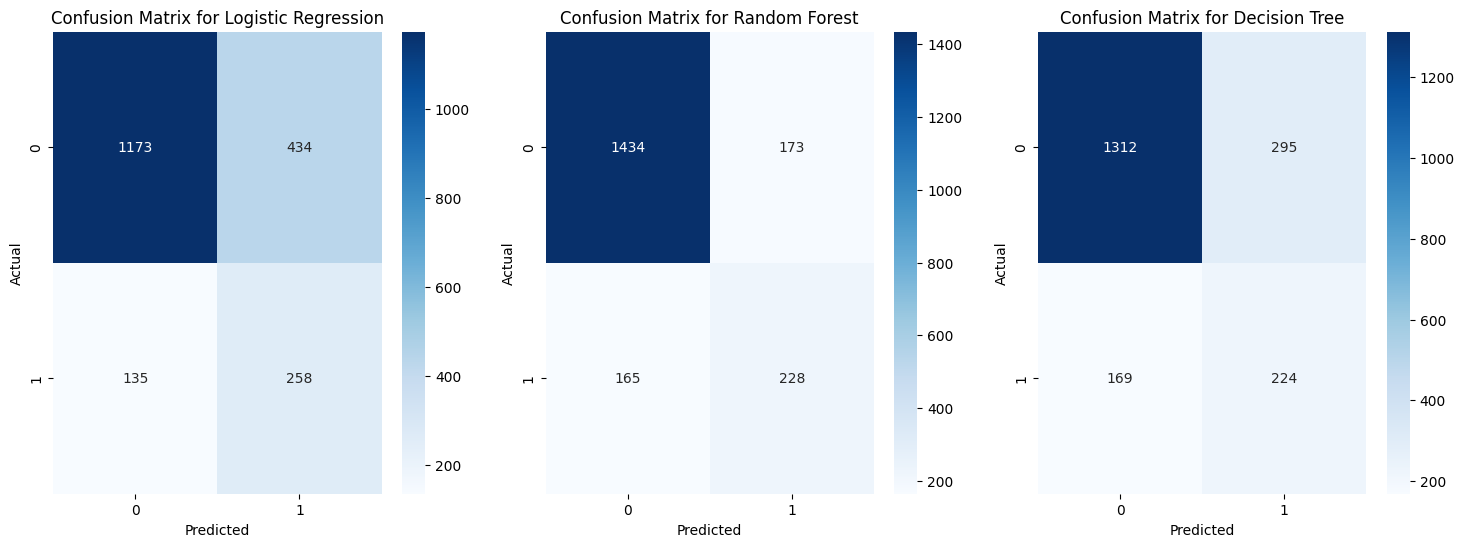

In [19]:
fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3, figsize=(18, 6))


sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix for Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')


sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix for Random Forest')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')


sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title('Confusion Matrix for Decision Tree') 
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

plt.show()